In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('../Assignment-3/adult_data_formatted.csv')
df.head()

,Unnamed: 0,age,workclass,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,0,25,Private,Machine-op-inspct,Male,0,0,40,United-States,0,7
1,1,38,Private,Farming-fishing,Male,0,0,50,United-States,0,9
2,2,28,Local-gov,Protective-serv,Male,0,0,40,United-States,1,12
3,3,44,Private,Machine-op-inspct,Male,7688,0,40,United-States,1,10
4,5,34,Private,Other-service,Male,0,0,30,United-States,0,6


In [5]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [6]:
df.head()

,age,workclass,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,25,Private,Machine-op-inspct,Male,0,0,40,United-States,0,7
1,38,Private,Farming-fishing,Male,0,0,50,United-States,0,9
2,28,Local-gov,Protective-serv,Male,0,0,40,United-States,1,12
3,44,Private,Machine-op-inspct,Male,7688,0,40,United-States,1,10
4,34,Private,Other-service,Male,0,0,30,United-States,0,6


In [7]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,8,2,6,1,0,0,39,38,0,6
1,21,2,4,1,0,0,49,38,0,8
2,11,1,10,1,0,0,39,38,1,11
3,27,2,6,1,96,0,39,38,1,9
4,17,2,7,1,0,0,29,38,0,5


In [14]:
columns=df.columns
X=df[columns]
y=df['income']
print(X.shape,y.shape)

(45222, 10) (45222,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
X_train

,age,workclass,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
9168,4,2,5,1,0,0,39,38,0,6
43815,26,2,3,1,0,55,49,38,1,12
43193,4,2,0,0,0,0,39,38,0,8
15087,32,2,2,1,0,0,39,38,0,8
27545,24,2,2,1,0,0,44,38,0,9
15145,11,2,6,0,0,0,24,38,0,9
3773,33,2,11,1,0,0,59,38,1,8
26303,24,2,0,1,0,0,39,38,0,8
2889,17,2,11,0,0,0,34,38,0,8
30657,15,2,2,1,106,0,59,38,1,6


In [17]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 1.0


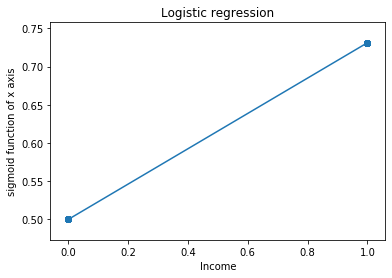

In [33]:
y=df['income']
z = 1/(1 + np.exp(-y))
plt.scatter(y,z)
plt.xlabel("Income")
plt.ylabel("sigmoid function of x axis")
plt.title("Logistic regression")
plt.plot(y,z)
plt.show()

In [11]:
print(logreg.intercept_,logreg.coef_)

[-3.09888565] [[ 4.31864167e-04 -2.06767055e-01 -3.79200478e-02  2.15360847e-01
   1.45288813e-02  1.32388554e-02 -2.11375563e-02 -7.43246745e-02
   1.37401859e+01 -3.25987114e-02]]


In [12]:
y_pred=logreg.predict(X_test)

In [13]:
metrics.accuracy_score(y_test,y_pred)

1.0

Text(33.0, 0.5, 'Actual classes')

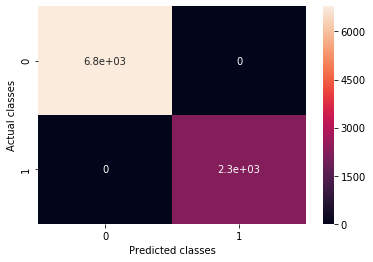

In [14]:
cfm=confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [15]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 1.0


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, X_train, 
         y_train, cv=5)
print(scores)
print(np.mean(scores))

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

[1. 1. 1. 1. 1.]
1.0


In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8934217799889441


In [18]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Model is 1.0


In [ ]:
# from sklearn.svm import SVC
# svc = SVC(gamma=0.22)
# svc.fit(X_train, y_train)
# #y_pred = logreg.predict(X_test)
# score_svc = svc.score(X_test,y_test)
# print('The accuracy of SVC is', score_svc)